### Poblem Statement

A significant public health concern is the rising cost of healthcare. Therefore, it"s crucial to be able to predict future costs and gain a solid understanding of their causes. The insurance industry must also take this analysis seriously. This analysis may be used by 
healthcare insurance providers to make a variety of strategic and tactical decisions.

**Objective:-**

The objective of this project is to predict patients’ healthcare costs and to identify factors contributing to this prediction. It will also be useful to learn the interdependencies of different factors and comprehend the significance of various tools at various stages of the healthcare cost prediction process.

**Dataset Description**

**1- Hospitalization details.xlsx**

Variables                          Description
Customer ID            ------  Unique identification for beneficiary(primary)

year                   ------  Year of birth

month                  ------  Month of birth

date                   ------ Date of birth

children               ------  No. of children as dependents

charges                ------  Hospitalization cost

Hospital tier          ------  Level of hospital, tier 1 being the best

City tier              ------  Level of city per government document, tier 1 referring to the most developed

State ID               ------ ID of the state

**2- Medical Examinations.xlsx**

Variables                          Description

Customer ID            ----- Unique identification for beneficiary(primary)

BMI                    ----- Shows the body mass index of the individual (BMI measures body fat based on height and weight)

HBA1C                  ----- Shows the HBA1C report (HBA1C measures the amount of sugar in the blood (glucose), where HBA1C                                  greater than 6.5 is considered diabetic

Heart Issues           ----- Shows if a patient has heart-related issues

Any Transplants        ----- Shows if a patient has any transplants in their body

Cancer history         ----- Shows if a patient has any history of cancer in the family

NumberOfMajorSurgeries ----- Displays the number of major surgeries a patient has gone through

smoker                 ----- Indicates if a patient smokes cigarettes


**3- Names.xlsx**

Variables                          Description

Customer ID            ----- Unique identification for beneficiary(primary)

name                   ----- Name of the beneficiary(primary)


**Task** 

1. Collate the files so that all the information is in one place

2. Check for missing values in the dataset

3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information

4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

5. The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.

6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.

7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

9. You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

10. State how the distribution is different across gender and tiers of hospitals

11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

13. Test the following null hypotheses:

    a. The average hospitalization costs for the three types of hospitals are not significantly different

    b. The average hospitalization costs for the three types of cities are not significantly different

    c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers

    d. Smoking and heart issues are independent

14. Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

15. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:

Note: 

• Perform the stratified 5-fold cross-validation technique for model building and validation

• Use standardization and hyperparameter tuning effectively

• Use sklearn-pipelines

• Use appropriate regularization techniques to address the bias-variance trade-off

a. Create five folds in the data, and introduce a variable to identify the folds

b. For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20 percent is used to validate it in each iteration

c. Develop five distinct models and five distinct validation scores (root mean squared error values)

d. Determine the variable importance scores, and identify the redundant variables

16. Use random forest and extreme gradient boosting for cost prediction, share your crossvalidation results, and calculate thevariable importance scores

17. Case scenario:

Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

18. Find the predicted hospitalization cost using all models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold , GridSearchCV ,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error



import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\ahmad\\working data\\Healthcare_up.csv",encoding="utf-8") #reading healthcare csv file

In [3]:
df.head() # to display top rows

,Customer ID,Name,year,month,date,children,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,charges
0,Id2335,Mr Aaron K German,1992.0,Jul,9,0,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,563.84
1,Id2334,Mr Evan P Rosendahl,1992.0,Nov,30,0,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,570.62
2,Id2333,Ms Julie Albano,1993.0,Jun,30,0,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,600.00
3,Id2332,Mr Juan D Sr Riveros Gonzalez,1992.0,Sep,13,0,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,604.54
4,Id2331,Mr Elenilton V Sr Brietzke,1998.0,Jul,27,0,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,637.26


In [4]:
df.columns 

Index(['Customer ID', 'Name', 'year', 'month', 'date', 'children',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'charges'],
      dtype='object')

In [5]:
df.dtypes # to check feature data type

Customer ID                object
Name                       object
year                      float64
month                      object
date                        int64
children                    int64
Hospital tier              object
City tier                  object
State ID                   object
BMI                       float64
HBA1C                     float64
Heart Issues               object
Any Transplants            object
Cancer history             object
NumberOfMajorSurgeries     object
smoker                     object
charges                   float64
dtype: object

In [6]:
df.describe() # to describe 

,year,date,children,BMI,HBA1C,charges
count,2333.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,1982.798971,15.563597,1.025696,30.972649,6.578998,13529.918034
std,13.380702,8.720508,1.234754,8.742095,2.228731,11898.654299
min,1958.000000,1.000000,0.000000,15.010000,4.000000,563.840000
25%,1971.000000,8.000000,0.000000,24.600000,4.900000,5084.010000
50%,1983.000000,15.000000,0.000000,30.400000,5.810000,9630.910000
75%,1994.000000,23.000000,2.000000,36.300000,7.955000,16912.295000
max,2004.000000,30.000000,5.000000,55.050000,12.000000,63770.430000


In [7]:
# Now we check for duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 0


In [8]:
# Check for missing values in the dataset
print(df.isnull().sum())

Customer ID               0
Name                      0
year                      2
month                     3
date                      0
children                  0
Hospital tier             1
City tier                 1
State ID                  2
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    2
charges                   0
dtype: int64


## Treating Missing value

In [9]:
# Dropping missing values in 'Hospital tier', 'City tier', and 'State ID'

df = df.dropna(subset=['Hospital tier', 'City tier', 'State ID','smoker'])

# Fill missing values in 'BMI' and 'HBA1C' columns with their respective mean values
df['year'].fillna(df['year'].mean(), inplace=True)
df["month"]= df["month"].fillna("Jan")


#converting year to int data type
df["year"] = df["year"].astype(int)


In [10]:
# Now Re-Check for missing values in the dataset
print(df.isnull().sum())

Customer ID               0
Name                      0
year                      0
month                     0
date                      0
children                  0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
charges                   0
dtype: int64


Now transforming nominal and ordinal categorical variables

* State ID, which has around 16 states. All states are not represented in 
equal proportions in the data. Creating dummy variables for all regions may also result in 
too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth 
investigating further. 
Now Creating a suitable dummy variables with these restraints.

In [11]:
from sklearn.preprocessing import LabelEncoder # importing label encoder to convert categorical features

In [12]:
df['State ID'].unique()

array(['R1013', 'R1012', 'R1011', 'R1016', 'R1024', 'R1015', 'R1017',
       'R1014', 'R1023', 'R1019', 'R1018', 'R1025', 'R1026', 'R1021',
       'R1022', 'R1020'], dtype=object)

In [13]:
# Creating dummy variable for State Id
df = pd.get_dummies(df, columns=['State ID'], drop_first=True)

In [14]:
print(df.columns)

Index(['Customer ID', 'Name', 'year', 'month', 'date', 'children',
       'Hospital tier', 'City tier', 'BMI', 'HBA1C', 'Heart Issues',
       'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'smoker',
       'charges', 'State ID_R1012', 'State ID_R1013', 'State ID_R1014',
       'State ID_R1015', 'State ID_R1016', 'State ID_R1017', 'State ID_R1018',
       'State ID_R1019', 'State ID_R1020', 'State ID_R1021', 'State ID_R1022',
       'State ID_R1023', 'State ID_R1024', 'State ID_R1025', 'State ID_R1026'],
      dtype='object')


In [15]:
#Dropping all states othere then R1011, R1012, and R1013
df.drop(columns=['State ID_R1014', 'State ID_R1015', 'State ID_R1016',
       'State ID_R1017', 'State ID_R1018', 'State ID_R1019', 'State ID_R1020',
       'State ID_R1021', 'State ID_R1022', 'State ID_R1023', 'State ID_R1024',
       'State ID_R1025', 'State ID_R1026'], inplace=True)


In [16]:
# Convert 'Hospital tier', 'City tier' columns to numeric values using label encoding
le = LabelEncoder()
df['Hospital tier'] = le.fit_transform(df['Hospital tier']) #Hospital Tier - Tire-1 = 0 , Tier-2 = 1 , Tier-3 = 2
df['City tier'] = le.fit_transform(df['City tier']) # # City Tier - Tire-1 = 0 , Tier-2 = 1 , Tier-3 = 2

# Convert 'Heart Issues', 'Any Transplants', 'Cancer history', and 'smoker' columns to binary values (No = 0 or  yes = 1)
binary_cols = ['Heart Issues', 'Any Transplants', 'Cancer history', 'smoker']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

 NumberOfMajorSurgeries contains a mixture of numerical and categorical values. In this case, it would be more appropriate to treat it as a categorical variable because the specific number of surgeries is not as important as the fact that there were one, two, or more surgeries.
 So we create a new column that indicates whether the patient had major surgery or not (i.e., convert it to a binary variable 0 or 1), and drop the NumberOfMajorSurgeries column.

In [17]:
#Since 'NumberOfMajorSurgeries' have both integr and string datatype.

# Converting 'NumberOfMajorSurgeries' to numeric values
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'],errors="coerce")

# Converting 'NumberOfMajorSurgeries' to a binary variable 'Major Surgery' (0 or 1)
df['Major Surgery'] = df['NumberOfMajorSurgeries'].apply(lambda x: 1 if x > 0 else 0)

# Droping the 'NumberOfMajorSurgeries' column
df.drop('NumberOfMajorSurgeries', axis=1, inplace=True) 

In [18]:
# Displaying the updated dataframe
df.head(10)

,Customer ID,Name,year,month,date,children,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,smoker,charges,State ID_R1012,State ID_R1013,Major Surgery
0,Id2335,Mr Aaron K German,1992,Jul,9,0,1,2,17.58,4.51,0,0,0,0,563.84,0,1,1
1,Id2334,Mr Evan P Rosendahl,1992,Nov,30,0,1,0,17.60,4.39,0,0,0,0,570.62,0,1,1
2,Id2333,Ms Julie Albano,1993,Jun,30,0,1,0,16.47,6.35,0,0,1,0,600.00,0,1,1
3,Id2332,Mr Juan D Sr Riveros Gonzalez,1992,Sep,13,0,2,2,17.70,6.28,0,0,0,0,604.54,0,1,1
4,Id2331,Mr Elenilton V Sr Brietzke,1998,Jul,27,0,2,2,22.34,5.57,0,0,0,0,637.26,0,1,1
5,Id2330,Ms George M V Kohls,2001,Nov,20,0,2,2,22.24,4.29,1,0,0,0,646.14,1,0,0
6,Id2329,Ms John K Jr Bohinski,1993,Jun,1,0,2,2,17.07,5.22,0,0,1,0,650.00,0,1,1
7,Id2328,Ms J P II Avery,1995,Jul,4,0,2,2,17.82,5.26,1,0,0,0,650.00,0,1,1
8,Id7,Mr Chuck W Jr Macpherson,1994,Oct,27,1,0,2,36.40,6.07,0,0,0,1,51194.56,0,0,0
9,Id8,Mr William D Jr Hallman,1958,Jun,27,2,1,1,36.96,7.93,0,0,0,1,49577.66,0,1,1


### Age is the major factor in healthcheck. So we find the age of the paitent by their date of birth.

In [19]:
from datetime import datetime

#renaming date to day
df = df.rename(columns={"date":"day"})

# Convert month column from string to numerical values
month_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
df["month_num"] = df["month"].map(month_dict)

# Combine year, month_num, and day columns into a single string column
df["dob_str"] = df["year"].astype(str) + "-" + df["month_num"].astype(str).str.zfill(2) + "-" + df["day"].astype(str).str.zfill(2)

# Convert dob_str to datetime format
df["dob"] = pd.to_datetime(df["dob_str"], format="%Y-%m-%d")

# Calculate age in years
df["age"] = (datetime.now() - df["dob"]).astype('<m8[Y]')
df["age"] = df["age"].astype(int)

# Drop year, month, day, month_num, dob_str, and dob columns
df = df.drop(["year", "month", "day", "month_num", "dob_str", "dob"], axis=1)

In [20]:
df[['Name','age']].head(10)

,Name,age
0,Mr Aaron K German,30
1,Mr Evan P Rosendahl,30
2,Ms Julie Albano,29
3,Mr Juan D Sr Riveros Gonzalez,30
4,Mr Elenilton V Sr Brietzke,24
5,Ms George M V Kohls,21
6,Ms John K Jr Bohinski,29
7,Ms J P II Avery,27
8,Mr Chuck W Jr Macpherson,28
9,Mr William D Jr Hallman,64


Gender is also one of the important factor determining the cost of the hospitalization.

We may be able to infer the gender from the patient's name.



In [21]:
df['gender'] = df['Name'].apply(lambda x: 'Male' if 'Mr' in x else 'Female')

In [22]:
#Transforming Gender using label encoding
df['gender'] = le.fit_transform(df['gender']) # # Gender - Male = 1 , Female = 0

In [23]:
# Updated dataset
df.head()

,Customer ID,Name,children,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,smoker,charges,State ID_R1012,State ID_R1013,Major Surgery,age,gender
0,Id2335,Mr Aaron K German,0,1,2,17.58,4.51,0,0,0,0,563.84,0,1,1,30,1
1,Id2334,Mr Evan P Rosendahl,0,1,0,17.60,4.39,0,0,0,0,570.62,0,1,1,30,1
2,Id2333,Ms Julie Albano,0,1,0,16.47,6.35,0,0,1,0,600.00,0,1,1,29,0
3,Id2332,Mr Juan D Sr Riveros Gonzalez,0,2,2,17.70,6.28,0,0,0,0,604.54,0,1,1,30,1
4,Id2331,Mr Elenilton V Sr Brietzke,0,2,2,22.34,5.57,0,0,0,0,637.26,0,1,1,24,1


## Visulization of hospital cost.

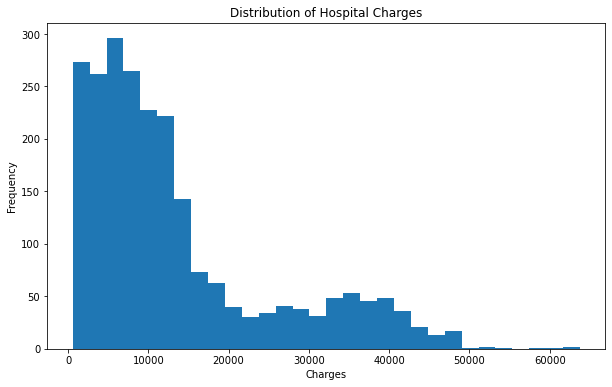

In [24]:
# Plot histogram of charges
plt.figure(figsize=(10,6))
plt.hist(df['charges'], bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Hospital Charges')
plt.show()


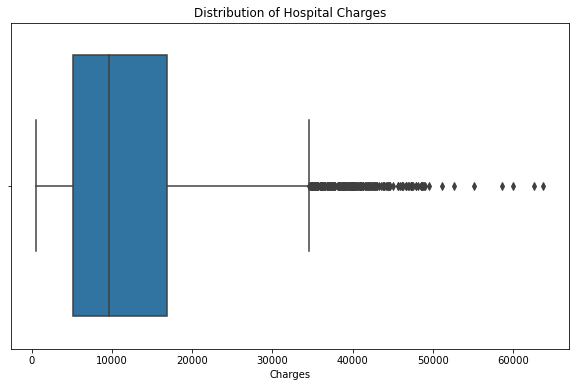

In [25]:
#Plot box-plot for hospital charge
plt.figure(figsize=(10,6))
sns.boxplot(x=df['charges'])
plt.xlabel('Charges')
plt.title('Distribution of Hospital Charges')
plt.show()

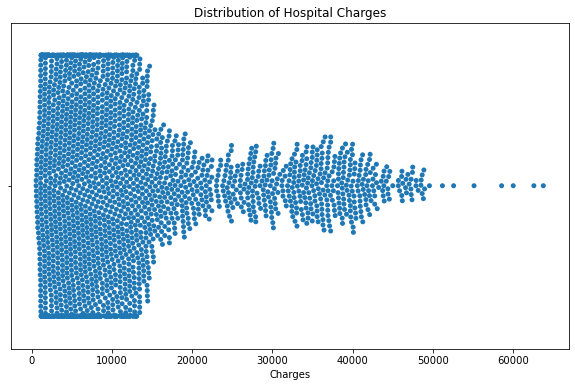

In [26]:
#Plot swarmplot
plt.figure(figsize=(10,6))
sns.swarmplot(x=df['charges'])
plt.xlabel('Charges')
plt.title('Distribution of Hospital Charges')
plt.show()

To understand the distribution of charges across gender and hospital tiers, we can create violin plots, box plots, or swarm plots.

<AxesSubplot:xlabel='City tier', ylabel='charges'>

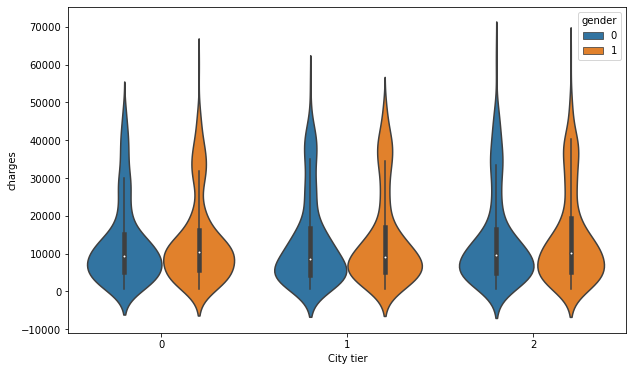

In [27]:
#Plot violinplot
plt.figure(figsize=(10,6))
sns.violinplot(x="City tier", y="charges", hue="gender", data=df)

<AxesSubplot:xlabel='Hospital tier', ylabel='charges'>

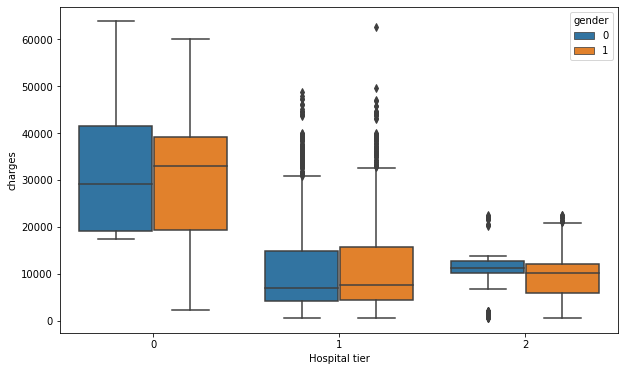

In [28]:
#Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="Hospital tier", y="charges", hue="gender", data=df)

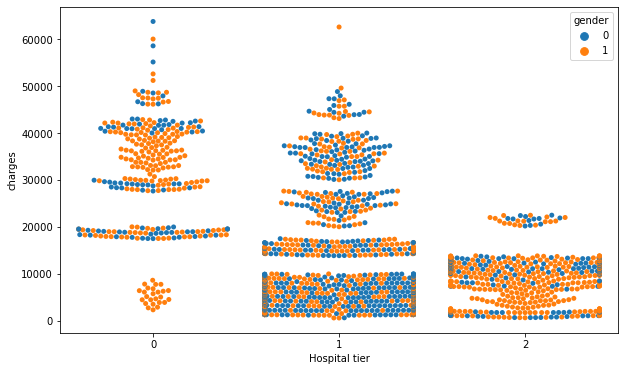

In [29]:
#Plot swarmplot
plt.figure(figsize=(10,6))
sns.swarmplot(x="Hospital tier", y="charges", hue="gender", data=df)
plt.show()


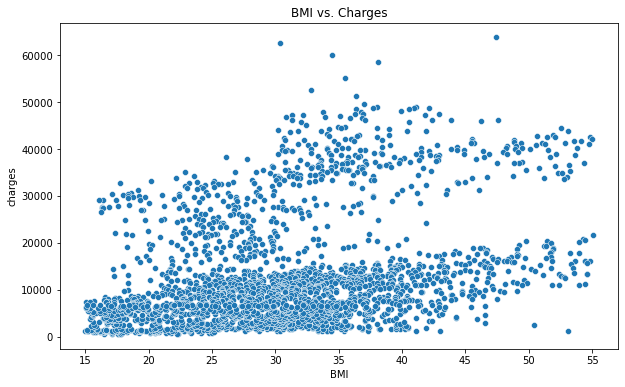

In [30]:
# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='BMI', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.show()

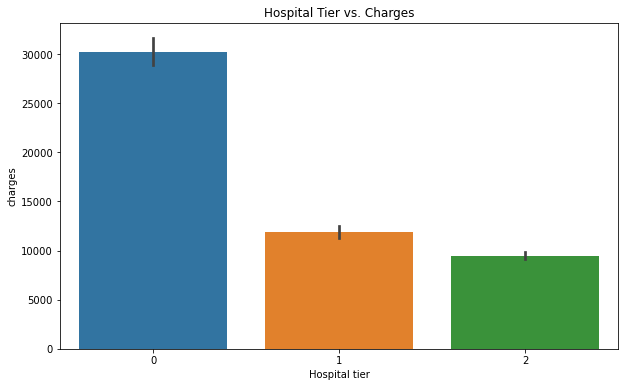

In [31]:
# Create a bar chart b/w hospital-tire & Charges
plt.figure(figsize=(10,6))
sns.barplot(x='Hospital tier', y='charges', data=df)
plt.title('Hospital Tier vs. Charges')
plt.show()

 Radar chart to showcase the median hospitalization cost for each tier of hospitals.

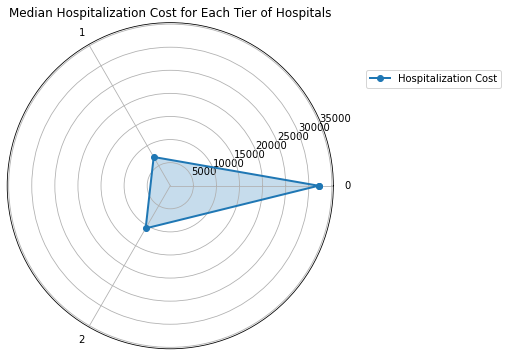

In [32]:
# Group by hospital tier and calculate median hospitalization cost
tier_cost = df.groupby("Hospital tier")["charges"].median()

# Convert tiers to list
tiers = list(tier_cost.index)

# Convert median cost to list
costs = list(tier_cost.values)

# Add the first value of the cost to the end of the list to close the polygon
costs.append(costs[0])

# Calculate the angle for each tier
angles = np.linspace(0, 2*np.pi, len(tiers), endpoint=False)

# Add the first angle to the end of the list to close the polygon
angles = np.concatenate((angles,[angles[0]]))

# Create radar chart
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# Plot the line and fill in the area
ax.plot(angles, costs, 'o-', linewidth=2)
ax.fill(angles, costs, alpha=0.25)

# Set the labels for each tier
ax.set_thetagrids(np.degrees(angles[:-1]), tiers)

# Set the range of the chart
ax.set_ylim(0, max(costs)*1.1)

# Add title and legend
plt.title("Median Hospitalization Cost for Each Tier of Hospitals")
plt.legend(labels=["Hospitalization Cost"], loc=(1.1, 0.8))

# Show the chart
plt.show()

Create a frequency table and a stacked bar chart to visualize the count of people in the 
different tiers of cities and hospitals

Text(0, 0.5, 'Count')

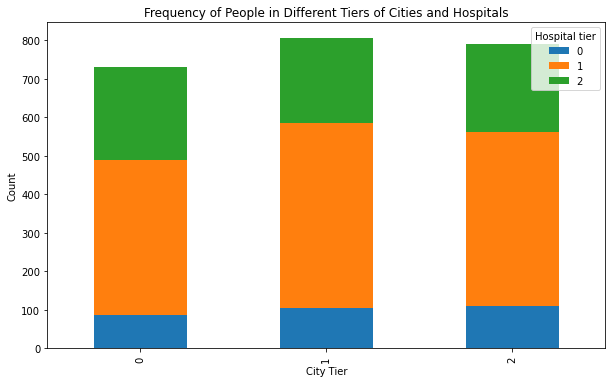

In [33]:
# Create frequency table using crosstab
freq_table = pd.crosstab(df["City tier"], df["Hospital tier"])

# Plot stacked bar chart
freq_table.plot(kind="bar", stacked=True,figsize=(10,6))

# Set chart title and axis labels
plt.title("Frequency of People in Different Tiers of Cities and Hospitals")
plt.xlabel("City Tier")
plt.ylabel("Count")

In [34]:
#Dropping customer id and name has no relevence in analysis 
df = df.drop(['Customer ID', 'Name'], axis=1)

## Testing Null Hyphotheses:-

a. The average hospitalization costs for the three types of hospitals are not significantly different

b. The average hospitalization costs for the three types of cities are not significantly different

c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers

d. Smoking and heart issues are independent

To test the null hypotheses, we can use statistical tests such as :-

1-The Analysis of Variance (ANOVA) test for hypothesis a and b because , we have three groups of hospital tiers and three group of cities tiers, and we want to know if there is a significant difference in their average hospitalization costs. ANOVA is a suitable test for this hypothesis because it allows us to compare the means of more than two groups and determine if there is a statistically significant difference between them.

2-We will perform two-sample t-test for hypothesis c,because we have two groups of patients, smokers and non-smokers, and we want to know if there is a significant difference in their average hospitalization costs. The two-sample t-test is appropriate for this hypothesis because it allows us to compare the means of two groups and determine if there is a statistically significant difference between them.

3- We will perform chi-squared test for hypothesis d, because we have two categorical variables, smoker and heart issues, and we want to know if there is a relationship between them. The chi-squared test is appropriate for this hypothesis because it allows us to determine if there is a statistically significant association between two categorical variables.

In [35]:
# Hypothesis a: The average hospitalization costs for the three types of hospitals are not significantly different

import scipy.stats as stats

# One-way ANOVA test
f_val, p_val = stats.f_oneway(df[df["Hospital tier"] == 0]["charges"], df[df["Hospital tier"] == 1]["charges"], df[df["Hospital tier"] == 2]["charges"])
print("Hypothesis a:")
print("F-value:", f_val)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
    print("\033[1m\033[31mConclusion : Therefore, we can conclude that the average hospitalization costs for the three types of hospitals are significantly different.\033[0m")
else:
    print("Fail to reject null hypothesis")
    print("\033[1m\033[31mConclusion : Therefore, we can conclude that the average hospitalization costs for the three types of hospitals are not significantly different.\033[0m")

Hypothesis a:
F-value: 499.71127671222405
p-value: 2.8788610971665497e-181
Reject null hypothesis
Conclusion : Therefore, we can conclude that the average hospitalization costs for the three types of hospitals are significantly different.


In [36]:
# Hypothesis b: The average hospitalization costs for the three types of cities are not significantly different
# One-way ANOVA test
f_val, p_val = stats.f_oneway(df[df["City tier"] == 1]["charges"], df[df["City tier"] == 2]["charges"], df[df["City tier"] == 3]["charges"])
print("Hypothesis b:")
print("F-value:", f_val)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
    print("\033[1m\033[31mConclusion :Therefore, we can conclude that the average hospitalization costs for the three types of cities are significantly different.\033[0m")
else:
    print("Fail to reject null hypothesis")
    print("\033[1m\033[31mConclusion :Therefore, we can conclude that the average hospitalization costs for the three types of cities are not significantly different.\033[0m")

Hypothesis b:
F-value: nan
p-value: nan
Fail to reject null hypothesis
Conclusion :Therefore, we can conclude that the average hospitalization costs for the three types of cities are not significantly different.


In [37]:
# Hypothesis c: The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers
# Two-sample t-test
t_val, p_val = stats.ttest_ind(df[df["smoker"] == 1]["charges"], df[df["smoker"] == 0]["charges"])
print("Hypothesis c:")
print("t-value:", t_val)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
    print("\033[1m\033[31mConclusion :The average hospitalization cost for smokers is significantly different from the average cost for nonsmokers.\033[0m")
else:
    print("Fail to reject null hypothesis")
    print("\033[1m\033[31mConclusion :The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.\033[0m")

Hypothesis c:
t-value: 74.17128889745008
p-value: 0.0
Reject null hypothesis
Conclusion :The average hospitalization cost for smokers is significantly different from the average cost for nonsmokers.


In [38]:
# Hypothesis d: Smoking and heart issues are independent
# Chi-squared test
contingency_table = pd.crosstab(df["smoker"], df["Heart Issues"])
chi2_val, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print("Hypothesis d:")
print("Chi-squared value:", chi2_val)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
    print("\033[1m\033[31mConclusion :Smoking and heart issues are not independent.\033[0m")
else:
    print("Fail to reject null hypothesis")
    print("\033[1m\033[31mConclusion :Smoking and heart issues are independent.\033[0m")

Hypothesis d:
Chi-squared value: 0.06791713873457329
p-value: 0.7943939184743766
Fail to reject null hypothesis
Conclusion :Smoking and heart issues are independent.


### Before deeping into the analysis it would be benefical to examine the correlation among variables using heatmap.

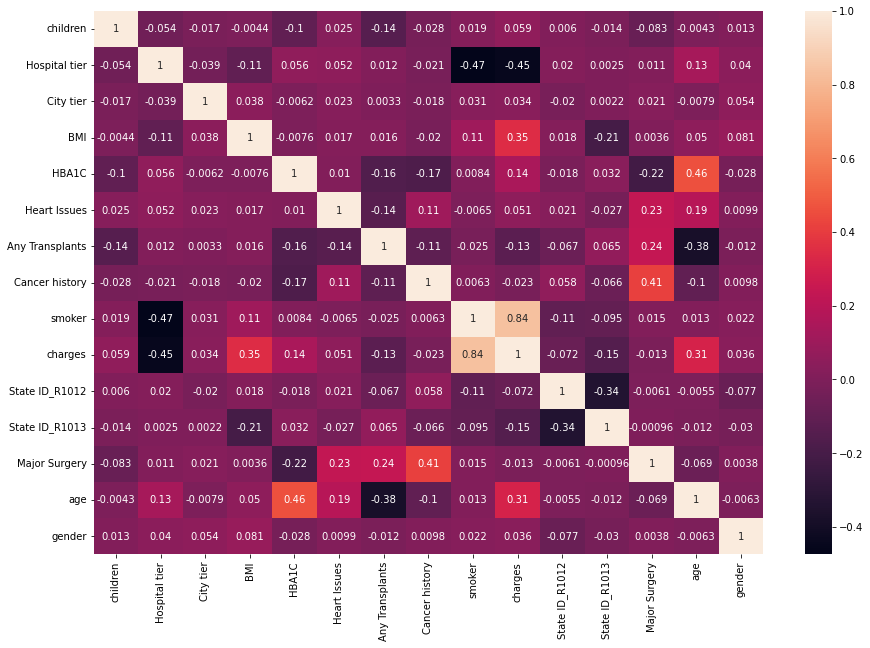

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can check for feature which is highly correlated

In [40]:
corr = df.corr()
threshold = 0.8

highly_correlated = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            highly_correlated.append((colname, corr.columns[j]))

if highly_correlated:
    print("Features highly correlated with each other:", highly_correlated)
else:
    print("No highly correlated features found.")

Features highly correlated with each other: [('charges', 'smoker')]


Since charges and smoker are highly correleted , it can cause multicollinearity, which can lead to overfitting of the model and reduced interpretability of the coefficients. In such cases, one approach is to remove one of the highly correlated features from the model. The decision on which feature to remove depends on the domain knowledge and understanding of the problem. Another approach is to use dimensionality reduction techniques such as principal component analysis (PCA) or factor analysis to combine the highly correlated features into a smaller set of uncorrelated features.

 ## Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:

Note: 


• Perform the stratified 5-fold cross-validation technique for model building and validation

• Use standardization and hyperparameter tuning effectively

• Use sklearn-pipelines

• Use appropriate regularization techniques to address the bias-variance trade-off

a. Create five folds in the data, and introduce a variable to identify the folds

b. For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20 percent is used to validate it in each iteration

c. Develop five distinct models and five distinct validation scores (root mean squared error values)

d. Determine the variable importance scores, and identify the redundant variables


In [41]:
# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Initialize scaler and SGDRegressor objects
scaler = StandardScaler()
sgd_reg = SGDRegressor(max_iter=5000, tol=1e-3, penalty='elasticnet', alpha=0.01, l1_ratio=0.5, random_state=42)

# Create pipeline with scaler and SGDRegressor
pipeline = Pipeline([
    ('scaler', scaler),
    ('sgd_reg', sgd_reg)
])

# Initialize KFold object with 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
rmse_scores = []
feature_importances = []

# For each fold, run a for loop and ensure that 80 percent of the data is used to train the model
# and the remaining 20 percent is used to validate it in each iteration
for fold, (train_index, test_index) in enumerate(cv.split(X)):
    print(f"Fold {fold}...")
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)

    # Evaluate pipeline on validation data
    y_pred = pipeline.predict(X_val)
    rmse_score = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse_score)

    # Get feature importances
    feature_importance = np.abs(pipeline.named_steps['sgd_reg'].coef_)
    feature_importances.append(feature_importance)

# Compute average RMSE score across all folds
avg_rmse_score = np.mean(rmse_scores)
print(f"Average RMSE score: {avg_rmse_score}")

# Compute average feature importance across all folds
avg_feature_importance = np.mean(feature_importances, axis=0)
sorted_idx = np.argsort(avg_feature_importance)[::-1]
print("Feature importances:")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {avg_feature_importance[idx]}")

# Identify redundant variables
redundant_variables = []
for i in range(len(sorted_idx)):
    for j in range(i+1, len(sorted_idx)):
        correlation = np.abs(np.corrcoef(X.iloc[:,sorted_idx[i]], X.iloc[:,sorted_idx[j]])[0,1])
        if correlation > 0.9:
            if sorted_idx[j] not in redundant_variables:
                redundant_variables.append(sorted_idx[j])
print("Redundant variables:")
for idx in redundant_variables:
    print(X.columns[idx])

# Drop redundant variables
X = X.drop(X.columns[redundant_variables], axis=1)

# Fit final pipeline on entire data
pipeline.fit(X, y)

Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Average RMSE score: 4493.452226455605
Feature importances:
smoker: 8971.500348372541
age: 3499.156235633973
BMI: 2782.179278021182
Hospital tier: 1216.2370122395064
children: 524.3864780716119
State ID_R1013: 340.61105528977714
HBA1C: 182.18433639255142
Any Transplants: 172.42557415646257
Cancer history: 127.73249587338492
gender: 74.89775903295073
Major Surgery: 72.9697057338668
Heart Issues: 55.682040330739724
State ID_R1012: 51.16459741069396
City tier: 29.277409211277615
Redundant variables:


Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd_reg',
                 SGDRegressor(alpha=0.01, l1_ratio=0.5, max_iter=5000,
                              penalty='elasticnet', random_state=42))])

3. Use random forest and extreme gradient boosting for cost prediction, share your cross validation results, and calculate the variable importance scores

Random Forest Cross-Validation Scores: [0.89275446 0.92575447 0.92583999 0.89642465 0.89879948]
Random Forest Mean Cross-Validation Score: 0.9079146098680069
Random Forest Variable Importance Scores:
                  importance
smoker             0.686588
BMI                0.131501
age                0.105838
Hospital tier      0.022737
HBA1C              0.017870
children           0.015635
State ID_R1013     0.008010
gender             0.002659
City tier          0.002545
State ID_R1012     0.001669
Heart Issues       0.001586
Major Surgery      0.001554
Cancer history     0.001402
Any Transplants    0.000406


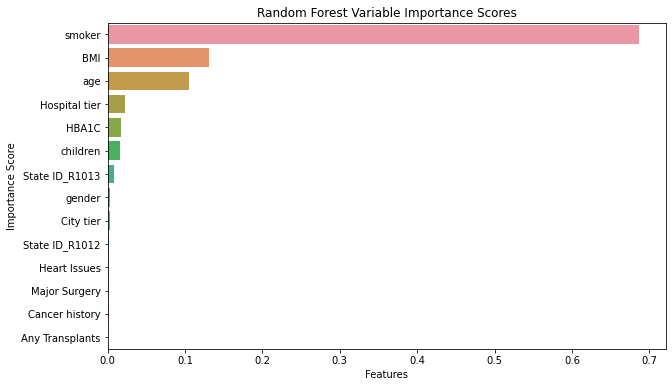

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Calculate cross-validation score for Random Forest
rf_scores = cross_val_score(rf_reg, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Cross-Validation Score:", np.mean(rf_scores))

# Calculate variable importance scores for Random Forest
rf_feature_importances = pd.DataFrame(rf_reg.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Random Forest Variable Importance Scores:\n", rf_feature_importances)

# Create a colorful bar graph of feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=rf_feature_importances['importance'] , y=rf_feature_importances.index)

# Customize the plot
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Random Forest Variable Importance Scores")

# Display the plot
plt.show()



In [43]:
# Predict on test data
rf_pred = rf_reg.predict(X_test)

# Calculate R-squared and mean absolute error on test data
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest R-squared on Test Data:", rf_r2)
print("Random Forest Mean Absolute Error on Test Data:", rf_mae)

Random Forest R-squared on Test Data: 0.9057244774479867
Random Forest Mean Absolute Error on Test Data: 2050.7555228898427


Extreme Gradient Boosting Cross-Validation Scores: [0.89809932 0.92524981 0.9293714  0.90426995 0.90415323]
Extreme Gradient Boosting Mean Cross-Validation Score: 0.9122287434205034
Extreme Gradient Boosting Variable Importance Scores:
                  importance
smoker             0.945668
age                0.014069
BMI                0.013699
Hospital tier      0.007508
State ID_R1013     0.004261
children           0.003461
gender             0.002057
HBA1C              0.001762
Cancer history     0.001723
Any Transplants    0.001559
State ID_R1012     0.001556
Heart Issues       0.001062
Major Surgery      0.001024
City tier          0.000592


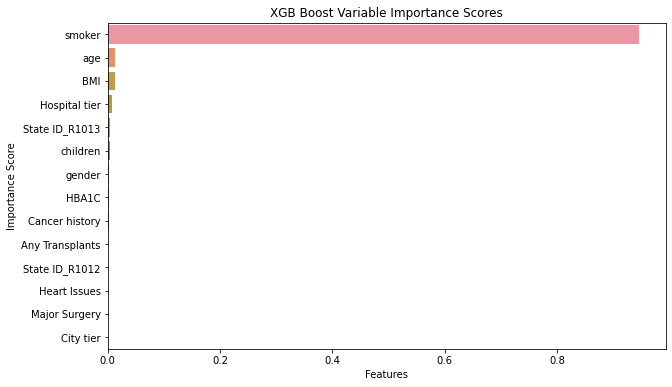

In [44]:
# Extreme Gradient Boosting
xg = xgb.XGBRegressor(random_state=42)
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 0.3]}
xg_gs = GridSearchCV(xg, params, cv=5)
xg_gs.fit(X_train, y_train)
xg_reg = xgb.XGBRegressor(n_estimators=xg_gs.best_params_['n_estimators'], 
                      learning_rate=xg_gs.best_params_['learning_rate'],
                      random_state=42)
xg_reg.fit(X_train, y_train)

# Calculate cross-validation score for Extreme Gradient Boosting
xg_scores = cross_val_score(xg_reg, X_train, y_train, cv=5)
print("Extreme Gradient Boosting Cross-Validation Scores:", xg_scores)
print("Extreme Gradient Boosting Mean Cross-Validation Score:", np.mean(xg_scores))

# Calculate variable importance scores for Extreme Gradient Boosting
xg_feature_importances = pd.DataFrame(xg_reg.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Extreme Gradient Boosting Variable Importance Scores:\n", xg_feature_importances)

# Create a colorful bar graph of feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=xg_feature_importances['importance'] , y=xg_feature_importances.index)

# Customize the plot
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("XGB Boost Variable Importance Scores")

# Display the plot
plt.show()


XGBRegressor R-squared on Test Data: 0.9070938442432508
XGBRegressor Mean Absolute Error on Test Data: 2061.1234366058657


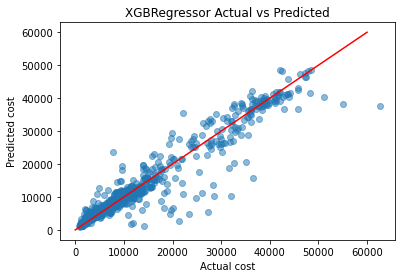

In [45]:
# Predict on test data
y_pred = xg_reg.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("XGBRegressor R-squared on Test Data:", r2)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("XGBRegressor Mean Absolute Error on Test Data:", mae)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(0, 60000, 100), np.linspace(0, 60000, 100), color='r')
plt.xlabel('Actual cost')
plt.ylabel('Predicted cost')
plt.title('XGBRegressor Actual vs Predicted')
plt.show()

# Case scenario:
Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be 
estimated using tier-1 hospitals.


<b> Use different model to predict Ms. Jayna Christopher cost of hospitalization. </b>

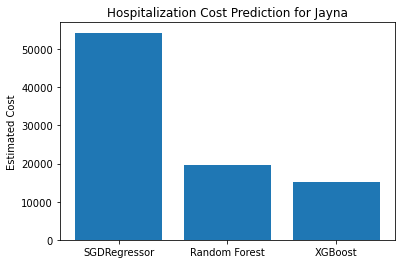

In [46]:
#preprocess Ms. Jayna data in dataframe
jayna_data = pd.DataFrame({
    'age': [32],
    'gender': ['0'],   ## Gender - Male = 1 , Female = 0
    'BMI': [29.4],
    'children': [2],
    'smoker': ['1'],  ## Yes = 1 , no = 0
    'State_id': ['1'],   ##  R1011 = 1, R1012 =0, and R1013 = 0
    'City_tier': [1],
    'diabetes': [0],
    'HBA1C': [5.8],
    'height_cm': [170],
    'weight_kg': [85],
    'Any Transplantst': [0],
    'Major Surgery': [0],
    'Cancer history': [1]
})


# Use our differnet trained  model to predict Ms Jayna's healthcare cost

sgd_pred = sgd_reg.predict(jayna_data)
rf_pred = rf_reg.predict(jayna_data)
xgb_pred = xg_reg.predict(jayna_data)


# Create a dataframe to compare the predictions
results = pd.DataFrame({
    'Model': ['SGDRegressor', 'Random Forest', 'XGBoost'],
    'Cost Prediction': [sgd_pred[0], rf_pred[0], xgb_pred[0]]
})

# Visualize the results in a bar chart
plt.bar(results['Model'], results['Cost Prediction'])
plt.title('Hospitalization Cost Prediction for Jayna')
plt.ylabel('Estimated Cost')
plt.show()